In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf

In [ ]:
IMAGE_SIZE = [250,250]

In [ ]:
Train_path = '/content/drive/MyDrive/My_Data/Train'

In [ ]:
Valid_path = '/content/drive/MyDrive/My_Data/Validation'

In [ ]:
Train_path

'/content/drive/MyDrive/My_Data/Train'

In [ ]:
Valid_path

'/content/drive/MyDrive/My_Data/Validation'

In [ ]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3],
            weights = 'imagenet',
            include_top= False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense (3,activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input,outputs=prediction)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip=True)

In [ ]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_data_gen.flow_from_directory( directory=Train_path,
                                                  target_size=IMAGE_SIZE,
                                                  batch_size=10,
                                                  class_mode='categorical')

Found 105 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Jacqueline': 0, 'Priyanka': 1, 'Sharukh': 2}

In [ ]:
test_set = test_data_gen.flow_from_directory(directory=Valid_path,
                                             target_size=IMAGE_SIZE,
                                             batch_size=10,
                                             class_mode='categorical')

Found 45 images belonging to 3 classes.


In [ ]:
test_set.class_indices

{'Jacqueline': 0, 'Priyanka': 1, 'Sharukh': 2}

In [ ]:
sample_train_images,label = next(training_set)

In [ ]:
label

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
label[0]

array([0., 0., 1.], dtype=float32)

In [ ]:
history = model.fit_generator(training_set,validation_data=test_set,epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
11/11 [==============================] - 10s 536ms/step - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.9300 - val_accuracy: 0.6889
Epoch 2/10
11/11 [==============================] - 3s 274ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 1.0330 - val_accuracy: 0.5556
Epoch 3/10
11/11 [==============================] - 3s 272ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.9776 - val_accuracy: 0.6667
Epoch 4/10
11/11 [==============================] - 3s 271ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 1.0001 - val_accuracy: 0.6667
Epoch 5/10
11/11 [==============================] - 3s 275ms/step - loss: 0.0376 - accuracy: 0.9905 - val_loss: 0.9299 - val_accuracy: 0.6667
Epoch 6/10
11/11 [==============================] - 3s 274ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.9564 - val_accuracy: 0.5556
Epoch 7/10
11/11 [==============================] - 3s 273ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 1.0049 - val_accuracy: 0.5333
Epoch

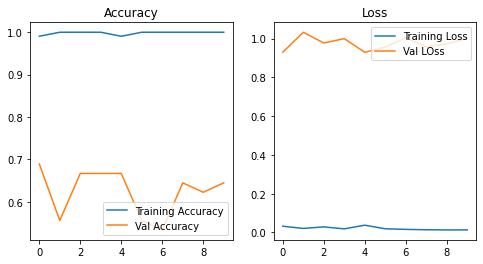

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
data_1 = load_img('/content/drive/MyDrive/Pred/jq.jpg',target_size=IMAGE_SIZE)

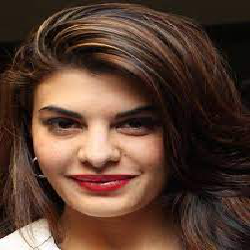

In [ ]:
data_1

In [ ]:
data_1 = img_to_array(data_1)

In [ ]:
data_1

array([[[ 36.,  27.,  18.],
        [ 36.,  27.,  18.],
        [ 36.,  27.,  18.],
        ...,
        [ 36.,  27.,  18.],
        [ 36.,  27.,  18.],
        [ 36.,  27.,  18.]],

       [[ 36.,  27.,  18.],
        [ 36.,  27.,  18.],
        [ 36.,  27.,  18.],
        ...,
        [ 36.,  27.,  18.],
        [ 36.,  27.,  18.],
        [ 36.,  27.,  18.]],

       [[ 36.,  27.,  18.],
        [ 36.,  27.,  18.],
        [ 36.,  27.,  18.],
        ...,
        [ 36.,  27.,  18.],
        [ 36.,  27.,  18.],
        [ 36.,  27.,  18.]],

       ...,

       [[248., 249., 244.],
        [248., 249., 244.],
        [248., 249., 244.],
        ...,
        [ 26.,  16.,  17.],
        [ 26.,  16.,  17.],
        [ 27.,  17.,  18.]],

       [[250., 247., 242.],
        [250., 247., 242.],
        [250., 247., 242.],
        ...,
        [ 27.,  17.,  18.],
        [ 27.,  17.,  18.],
        [ 29.,  19.,  20.]],

       [[251., 246., 242.],
        [251., 246., 242.],
        [251., 2

In [ ]:
data_1.shape

(250, 250, 3)

In [ ]:
img_test = data_1.reshape(1,250,250,3)

In [ ]:
pred= model.predict(img_test)

In [ ]:
pred

array([[1., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(pred)

0

In [ ]:
names = ['jaqline','Priyanka','Sharuk']

In [ ]:
names[np.argmax(pred)]

'jaqline'

In [ ]:
data_2 = load_img('/content/drive/MyDrive/Pred/pr.jpg',target_size=IMAGE_SIZE)

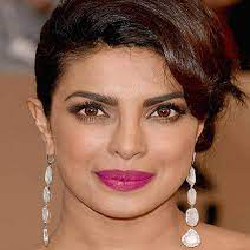

In [ ]:
data_2

In [ ]:
data_2=img_to_array(data_2)

In [ ]:
data_2

array([[[129., 110., 106.],
        [128., 109., 105.],
        [127., 108., 104.],
        ...,
        [  4.,   4.,   4.],
        [  4.,   4.,   4.],
        [  4.,   4.,   4.]],

       [[129., 110., 106.],
        [129., 110., 106.],
        [127., 108., 104.],
        ...,
        [  4.,   4.,   4.],
        [  4.,   4.,   4.],
        [  4.,   4.,   4.]],

       [[128., 110., 106.],
        [128., 110., 106.],
        [127., 109., 105.],
        ...,
        [  4.,   4.,   4.],
        [  4.,   4.,   4.],
        [  4.,   4.,   4.]],

       ...,

       [[163., 116.,  88.],
        [163., 116.,  88.],
        [163., 116.,  88.],
        ...,
        [201., 138., 105.],
        [201., 138., 105.],
        [201., 138., 105.]],

       [[162., 115.,  87.],
        [162., 115.,  87.],
        [162., 115.,  87.],
        ...,
        [200., 135., 103.],
        [200., 135., 103.],
        [200., 135., 103.]],

       [[162., 115.,  87.],
        [162., 115.,  87.],
        [162., 1

In [ ]:
data_2.shape

(250, 250, 3)

In [ ]:
img_test_1=data_2.reshape(1,250,250,3)

In [ ]:
pred_1=model.predict(img_test_1)

In [ ]:
np.argmax(pred_1)

1

In [ ]:
names[np.argmax(pred_1)]

'Priyanka'

In [ ]:
data_img =load_img('/content/drive/MyDrive/Pred/new_srk.jpg',target_size=IMAGE_SIZE)

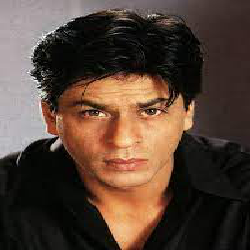

In [ ]:
data_img

In [ ]:
data_img=img_to_array(data_img)

In [ ]:
data_img

array([[[162., 151., 155.],
        [162., 151., 155.],
        [162., 151., 155.],
        ...,
        [ 58.,  43.,  40.],
        [ 58.,  43.,  40.],
        [ 58.,  43.,  40.]],

       [[163., 152., 156.],
        [163., 152., 156.],
        [163., 152., 156.],
        ...,
        [ 58.,  43.,  40.],
        [ 58.,  43.,  40.],
        [ 58.,  43.,  40.]],

       [[163., 152., 156.],
        [163., 152., 156.],
        [163., 152., 156.],
        ...,
        [ 58.,  43.,  40.],
        [ 58.,  43.,  40.],
        [ 58.,  43.,  40.]],

       ...,

       [[ 11.,  13.,  10.],
        [  9.,  11.,   8.],
        [  9.,  11.,   8.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  2.,   2.,   2.]],

       [[ 11.,  13.,  10.],
        [  9.,  11.,   8.],
        [  9.,  11.,   8.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  1.,   1.,   1.]],

       [[ 11.,  13.,  10.],
        [  9.,  11.,   8.],
        [  9.,  

In [ ]:
data_img.shape

(250, 250, 3)

In [ ]:
data_img=data_img.reshape(1,250,250,3)

In [ ]:
data_img= model.predict(data_img)

In [ ]:
data_img.round(2)

array([[0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(data_img)

2

In [ ]:
names[np.argmax(data_img)]

'Sharuk'